THINGS TO DO TO UPDATE WEBSITE: <br>
jupyter nbconvert --to html "Final Tutorial.ipynb" <br>
delete old index.html, rename "Final Tutorial.html" to index.html <br>
rename title in file to "Analysis of NFL Play by Play Data" <br>
<br>
THINK ABOUT: <br>
what looking at <br>
what predict <br>
what motivates, why important, what do you want to learn <br>
what see <br>
question <br>
scope <br>
<br>
CHECK IMPORT LINKS <br>
COMMENT CODE

# BEGIN
# ---------------------------------------------------------------------------------------------------------------

![NFL Logo](nfl_logo.png)

# Analysis of NFL Play by Play Data
Pierson Polcaro

# Introduction

The National Football League (NFL) is an American football league in the United States. American football is the most popular sport in the United States, with the NFL being the main league. There are 32 different teams from all over the country, divided into two Conferences, the American Football Conference (AFC) and the National Football Conference (NFC), which are then split into divisions of four teams each. The object of the game, like many others, is to score more points than the other team, through methods such as a touchdown (6 points), with an extra point attempt (1 point), a field goal (3 points), or a safety (2 points).

There has been much statistical analysis of this sport, in many different areas. Analysis has been done on individual players, teams, and the game as a whole. This analysis is valuable because the teams are always looking to be better at what they do, and statistical analysis can give more insight into why certain events happen, and potentially give teams an advantage over others.

In this tutorial, I intend to look at different aspects of this game, and investigate when certain events happen, and if certain statistics are good predictors of others.

The data we will be using is detailed play by play data for NFL games from 2009 to 2017, posted on kaggle under the username "Max Horowitz." This dataset includes a lot of information for each play, such as times, teams, play intentions, and play outcomes. The dataset can be found [here](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016).

## Technologies

In order to explore and analyze the data, we will use the following technologies: <br>
- [Python](https://www.python.org/) <br>
- [Matplotlib](https://matplotlib.org/) <br>
- [NumPy](https://numpy.org/) <br>
- [Pandas](https://pandas.pydata.org/) <br>
- [SciPy](https://www.scipy.org/) <br>
- [Seaborn](https://seaborn.pydata.org/)

In [1]:
# import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn

# Data Collection

The first step in data analysis is to get the data. Because the comma separated values (CSV) file of play information is so large, we have to load it in chunks, so we don't run out of memory.

In [2]:
# read data in chunks so it fits in memory
chunks = pd.read_csv("NFL Play by Play 2009-2017.csv", chunksize=1000)
data = pd.concat(chunks)
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


# Data Processing

Above, we can see the first and last few columns of the first five rows. We can also see that there are a total of 102 columns. We have no use for all of these, so we must delete those that we will not use. Unnecessary columns include those related to probability (we do not know how they were calculated or exactly what they refer to), and columns with vague titles.

In [3]:
# remove columns related to probability
for col in data.columns:
    if "Prob" in col or "WP" in col or "EPA" in col:
        del data[col]

# remove columns we will not use
del data["ExpPts"]
del data["sp"]
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,PIT,TEN,0,None,3,3,3,3,3,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,PIT,TEN,0,None,3,3,3,3,3,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,PIT,TEN,0,None,3,3,3,3,3,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,PIT,TEN,0,None,3,3,3,3,3,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,PIT,TEN,0,None,3,3,3,3,3,2009


As seen under the above dataframe, we now only have 80 columns, meaning we have cut out 22 useless columns.

There is a column with the number of seconds until the end of the game, but it will be useful to also have a column with the time since the beginning of the game. To create this, we simply have to subtract each entry in the column from the number of seconds in regulation time, 3600.

In [4]:
# create column for time from start of game
data["game_time_sec"] = 3600 - data["TimeSecs"]

There are a few columns that inform us if a turnover has happened, but it would be useful to combine these so we can know if a turnover has happened at all. A turnover counts as an interception or a fumble where the defending team ends up with the ball.

In [5]:
# create column to classify play as turnover or not
# a turnover is defined as an interception or a fumble picked up by the defense
data["turnover"] = 0
for i in range(len(data)):
    if data.at[i, "InterceptionThrown"] or (data.at[i, "Fumble"] and data.at[i, "RecFumbTeam"] == data.at[i, "DefensiveTeam"]):
        data.at[i, "turnover"] = 1

There are several columns that tell us if a team scored a certain type of points, but it would be useful to have a column that tells us if a team scored at all. We will create two columns to measure this, one for the team that has the ball, and the other for the defending team. For the team with the ball, we will count a score as a touchdown or a field goal, as an extra point is directly connected to a touchdown. For the defense, we will count a score as a touchdown that they get while on the defense, or a safety that they score.

In [6]:
# create columns to classify when offense and defense score
# offense scores when they score a touchdown or a field goal
# defense scores when they get a turnover and a touchdown, or a safety
data["posteam_scored"] = 0
data["defteam_scored"] = 0
for i in range(len(data)):
    if (data.at[i, "Touchdown"] and not data.at[i, "turnover"]) or data.at[i, "FieldGoalResult"] == "Good":
        data.at[i, "posteam_scored"] = 1
    if (data.at[i, "Touchdown"] and data.at[i, "turnover"]) or data.at[i, "Safety"]:
        data.at[i, "defteam_scored"] = 1

# Data Visualization

### Points vs time

The first question that we will investigate is if there are certain time periods during games that teams score points. To achieve this, we can graph the occurrence of scoring over game time. We will do this with histograms, as we are graphing frequencies.

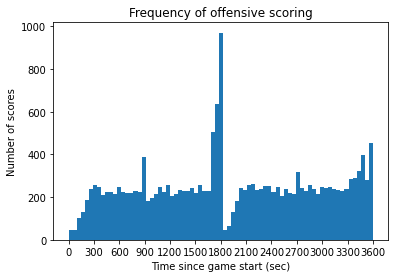

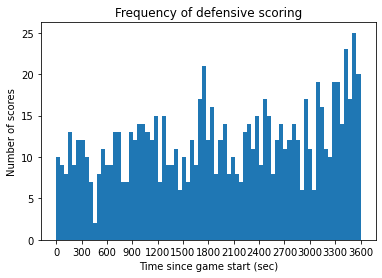

In [7]:
# plot frequency of offense scoring
pos_scores = []
for i in range(len(data)):
    if data.at[i, "posteam_scored"] and data.at[i, "game_time_sec"] <= 3600:
        pos_scores.append(data.at[i, "game_time_sec"])
plt.hist(pos_scores, bins=75)
plt.xticks(np.arange(0, 3601, 300))
plt.xlabel("Time since game start (sec)")
plt.ylabel("Number of scores")
plt.title("Frequency of offensive scoring")
plt.show()

# plot frequency of defense scoring
def_scores = []
for i in range(len(data)):
    if data.at[i, "defteam_scored"] and data.at[i, "game_time_sec"] <= 3600:
        def_scores.append(data.at[i, "game_time_sec"])
plt.hist(def_scores, bins=75)
plt.xticks(np.arange(0, 3601, 300))
plt.xlabel("Time since game start (sec)")
plt.ylabel("Number of scores")
plt.title("Frequency of defensive scoring")
plt.show()

There are a number of features in the above graphs that can be discussed, but many may not be surprising to football fans. The first obvious item that can be seen is the large spike in the middle of the offensive scoring graph. This spike is easily 4 to 5 times larger than the graph at almost any other time of the game. This spike takes place right before 1800 seconds, which is the end of the first half of the game. After half of the game, it does not matter who has the ball, as a kickoff always starts off the second half, so teams want to score if they have the ball at this time. This large spike shows that this is a very heavy source of encouragement, as teams seem to love to score at this time. A similar, yet smaller, spike can also be seen at the end of the first quarter (900 seconds), and an increase at the end of the game. The spike at the end of the first quarter is somewhat surprising, as the team that has the ball at that time will continue to have possession into the second quarter. As for the increase at the end of the game, teams who are losing the game by a small margin have a very large incentive to score at this time, as it could win them the game.

In the defensive graph, there are still a few spikes, but they are relatively much smaller. The only noticeable spikes that can be seen in this graph are at halftime and the end of the game. These peaks are likely for much of the same reasons as for the offensive graph. For the rest of the time in the game, we can see in both graphs that the frequency does not vary much. This is because teams are always wanting to score. One major difference that can be seen in comparing the graphs is that defenses score far fewer times than offenses. This is because turnovers happen few times per game, even fewer directly resulting in points.

### Pass vs run

Next we will compare the frequencies of the two main play types, pass and run. In any regular offensive play during the game, almost all plays will be a pass or a run, so it would be interesting to see if one type was significantly more prevalent than the other. First, we will find the number of each type of play.

In [8]:
num_pass = len(data[data["PlayType"]=="Pass"])
num_run = len(data[data["PlayType"]=="Run"])
print("Number of pass plays:", num_pass)
print("Number of run plays:", num_run)

Number of pass plays: 159353
Number of run plays: 120831


We can see that there are about 40,000 more pass plays than runs, but we do not know how statistically significant this difference is. We are in luck, as there is indeed a way to see if this is a statistically significant difference: the binomial test. We make our null hypothesis $H_0$: There is no bias towards either play type. Our alternate hypothesis is $H_1$: Plays are biased towards passing. If the p-value we get from the binomial test is less than 0.05, we can reject our null hypothesis.

In [9]:
print("Binomial test p value:", scipy.stats.binom_test([num_pass, num_run]))

Binomial test p value: 2e-323


As we can see, the p-value is much smaller than 0.05, meaning that there is a statistically significant difference. We can thus conclude that in the NFL in general, teams are more likely to pass the ball than run a statistically significant amount of the time.

### Interceptions

pass length- deep vs short, pass location- left right middle

# Analysis

# Insight